## Problem Statement

Based on the dataset where we have to classify the cellular localization sites of proteins. Here we are working on the dataset with various features which are the dimensions and singles given by the business we have to create the classification algorithm using support vector machine.

**Dataset** - Yeast_Data.csv

**Developer** - Saurav Bhagat

# Import Libraries

In [74]:
#Importing the libraries which will be helpful for the data analysis. 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import os 
import warnings
warnings.simplefilter("ignore")

In [75]:
dataset = pd.read_csv('Yeast_Data.csv')

In [76]:
dataset.head()

,SequenceName,MCG,GVH,ALM,MIT,ERL,POX,VAC,NUC,YeastType
0,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
1,AATC_YEAST,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,CYT
2,BAF1_YEAST,0.48,0.45,0.59,0.20,0.5,0.0,0.58,0.34,NUC
3,ABP1_YEAST,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30,CYT
4,ACE1_YEAST,0.43,0.39,0.54,0.21,0.5,0.0,0.53,0.27,NUC


In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SequenceName  892 non-null    object 
 1   MCG           892 non-null    float64
 2   GVH           892 non-null    float64
 3   ALM           892 non-null    float64
 4   MIT           892 non-null    float64
 5   ERL           892 non-null    float64
 6   POX           892 non-null    float64
 7   VAC           892 non-null    float64
 8   NUC           892 non-null    float64
 9   YeastType     892 non-null    object 
dtypes: float64(8), object(2)
memory usage: 69.8+ KB


In [78]:
dataset.isnull().sum()/len(dataset)*100

SequenceName    0.0
MCG             0.0
GVH             0.0
ALM             0.0
MIT             0.0
ERL             0.0
POX             0.0
VAC             0.0
NUC             0.0
YeastType       0.0
dtype: float64

In [79]:
dataset.columns

Index(['SequenceName', 'MCG', 'GVH', 'ALM', 'MIT', 'ERL', 'POX', 'VAC', 'NUC',
       'YeastType'],
      dtype='object')

# Exploratory Data Analysis

<Figure size 1500x200 with 0 Axes>

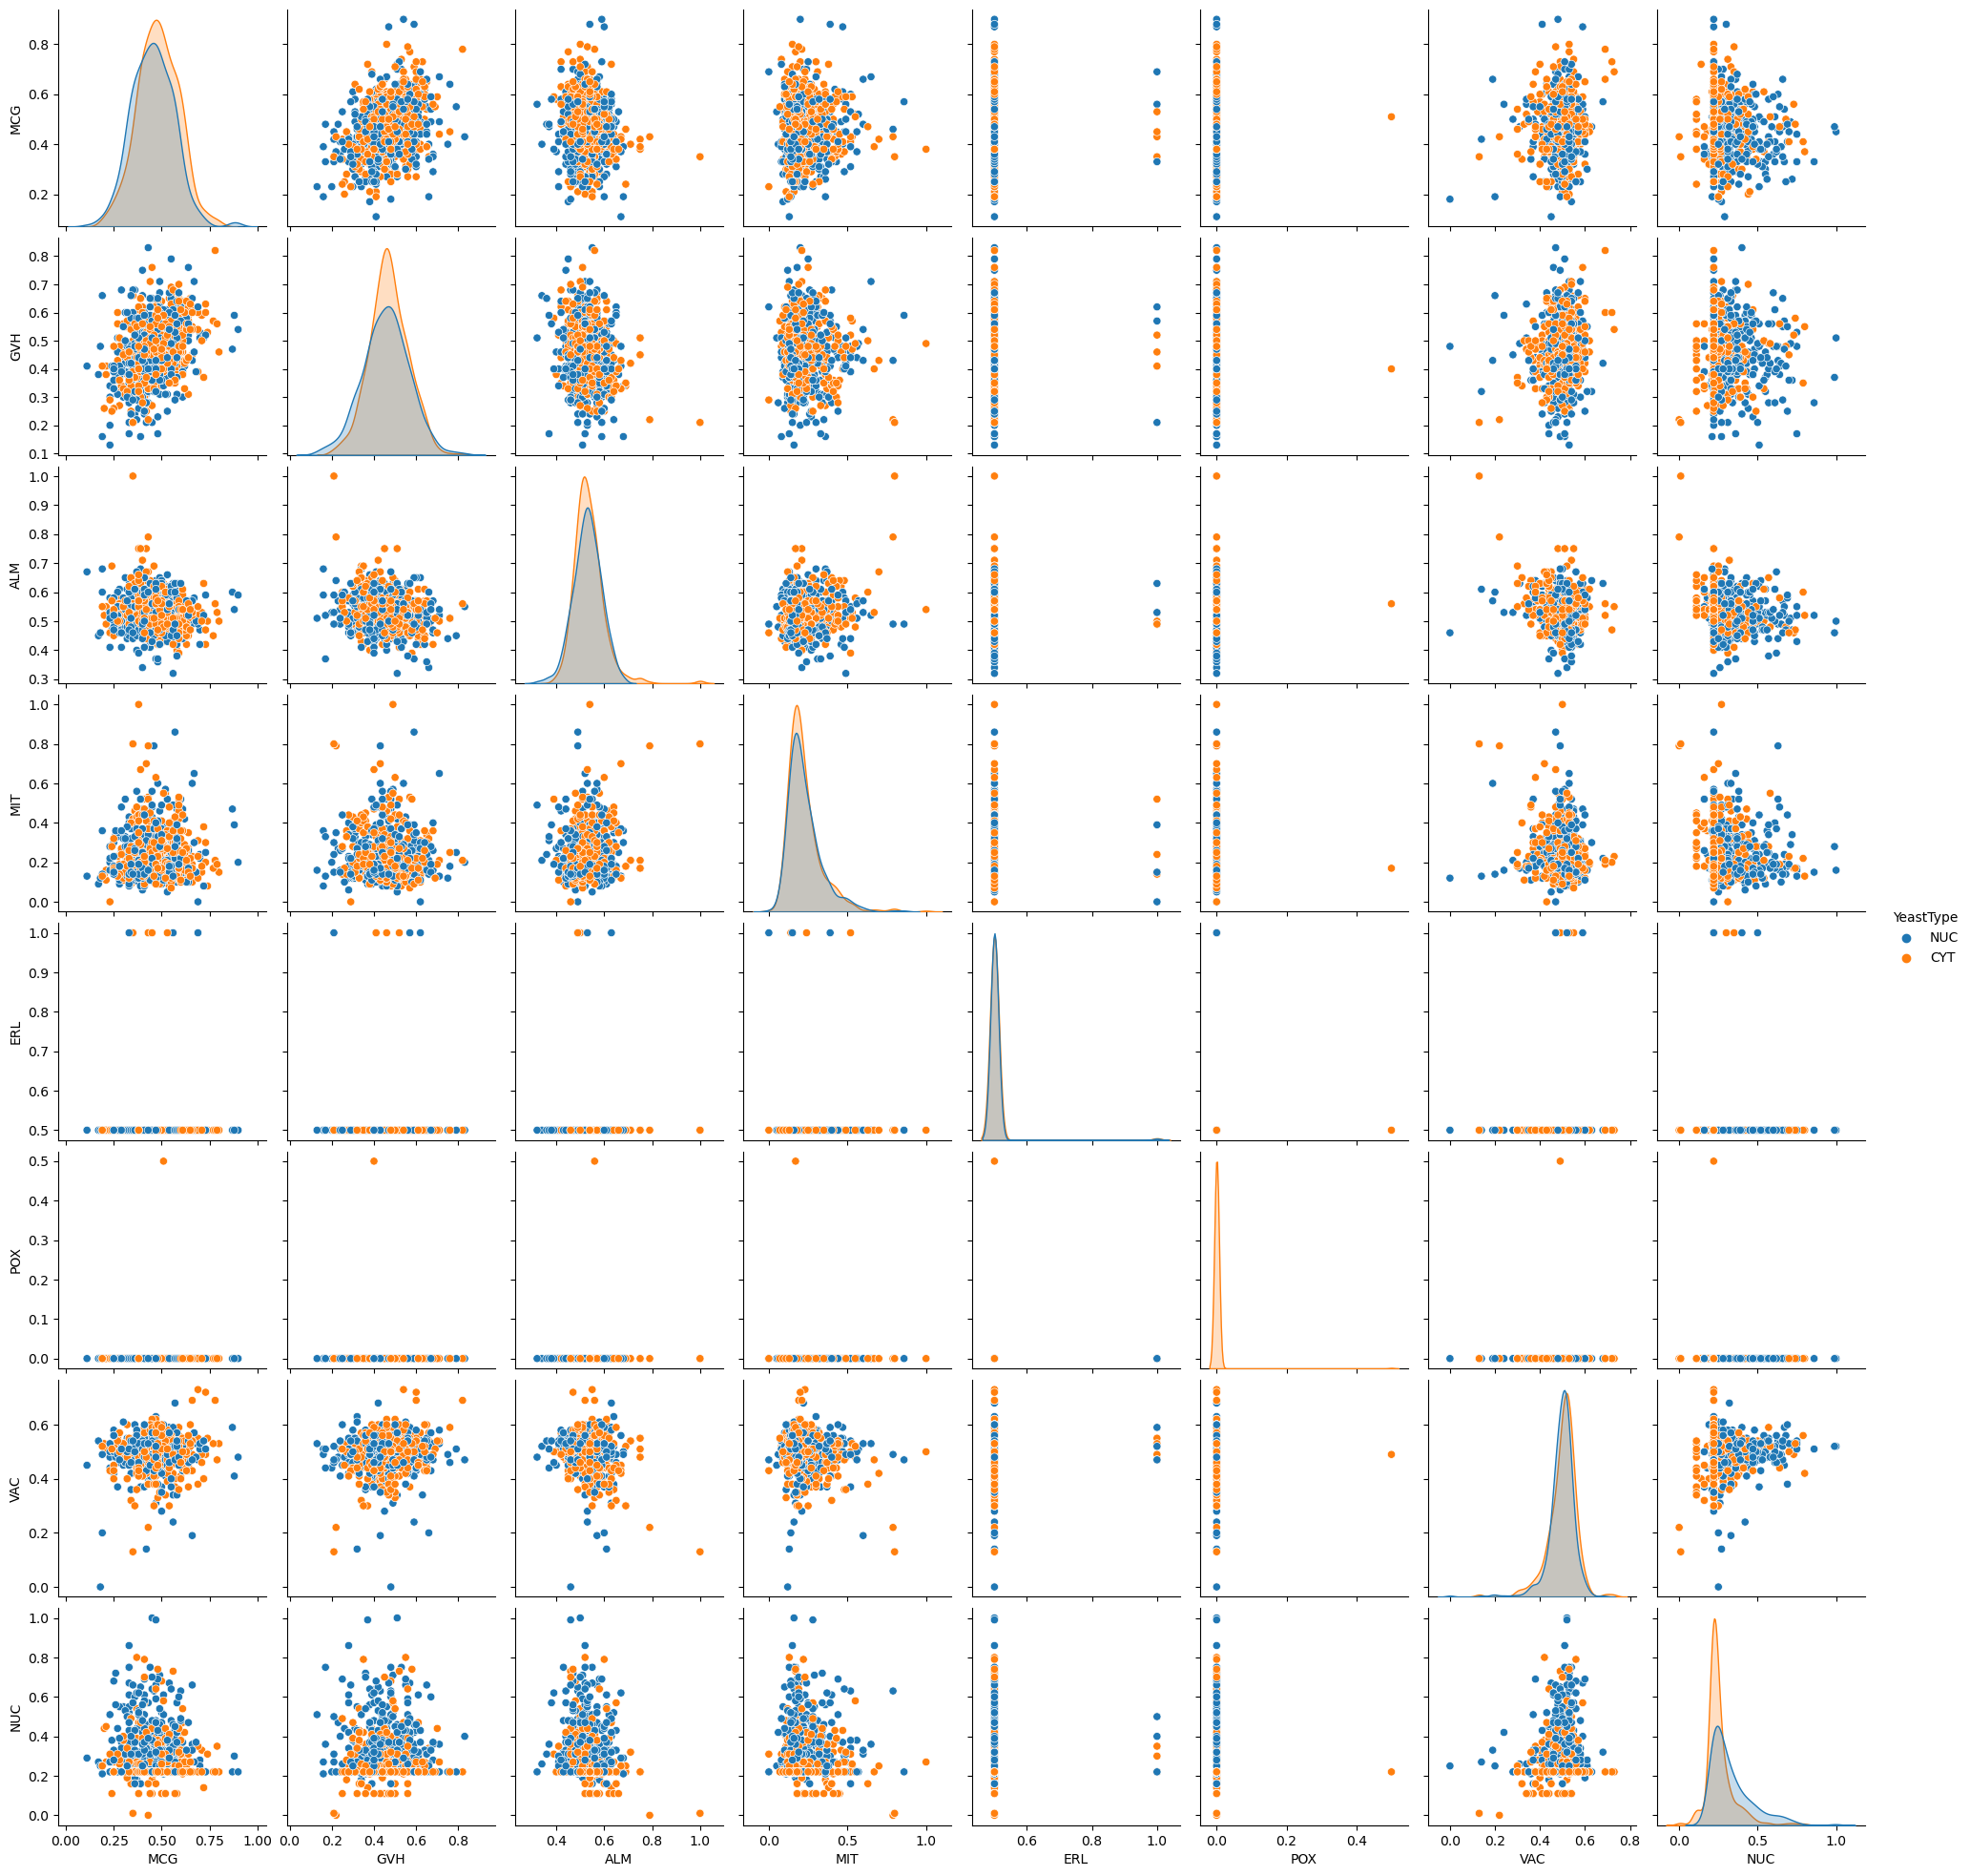

In [80]:
plt.figure(figsize=(15,2))
sns.pairplot(dataset[['MCG', 'GVH', 'ALM', 'MIT', 'ERL', 'POX', 'VAC', 'NUC','YeastType']],hue='YeastType')
plt.show()

# Encoding and Feature Scaling

In [81]:
# Separating the numerical and categorical columns
from sklearn.preprocessing import StandardScaler
def data_type(dataset):

    numerical = []
    categorical = []
    for i in dataset.columns:
        if dataset[i].dtype == 'int64' or dataset[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical


numerical, categorical = data_type(dataset)

# Identifying the binary columns and ignoring them from scaling
def binary_columns(df):
    
    binary_cols = []
    for col in df.select_dtypes(include=['int', 'float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(dataset)

# Remove the binary columns from the numerical columns
numerical = [i for i in numerical if i not in binary_cols]

def encoding(dataset, categorical):
   
    for i in categorical:
        dataset[i] = dataset[i].astype('category')
        dataset[i] = dataset[i].cat.codes
    return dataset

dataset = encoding(dataset, categorical)

def feature_scaling(dataset, numerical):
    
    sc_x = StandardScaler()
    dataset[numerical] = sc_x.fit_transform(dataset[numerical])
    return dataset

dataset = feature_scaling(dataset, numerical)

In [82]:
dataset

,SequenceName,MCG,GVH,ALM,MIT,ERL,POX,VAC,NUC,YeastType
0,2,1.026911,-0.228006,0.607699,-0.868168,-0.088936,-0.033501,0.691290,-0.597676,1
1,3,0.390102,-0.623306,0.445695,-0.512732,-0.088936,29.849623,-0.109737,-0.597676,0
2,42,0.117184,-0.129181,0.931709,-0.246155,-0.088936,-0.033501,1.332111,0.384292,1
3,4,-0.610599,-0.722131,1.093713,-0.690450,-0.088936,-0.033501,1.332111,0.056970,0
4,5,-0.337680,-0.722131,0.121685,-0.157296,-0.088936,-0.033501,0.531084,-0.188522,1
...,...,...,...,...,...,...,...,...,...,...
887,493,-0.792544,-1.413906,1.741732,1.619882,-0.088936,-0.033501,-0.910764,-1.497813,0
888,494,-0.792544,-0.623306,2.065742,1.086729,-0.088936,-0.033501,-1.070969,-1.497813,0
889,868,0.026211,-0.326831,1.255718,1.531023,-0.088936,-0.033501,-0.269942,1.448091,1
890,869,-0.337680,-0.623306,1.093713,-0.601591,-0.088936,-0.033501,0.531084,0.793446,1


# Data Split

In [83]:
x = dataset.iloc[:,1:9].values 
y = dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

# Model Training

In [84]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

SVC()

In [85]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, accuracy_score

In [86]:
y_test_pred = model.predict(x_test) 

In [87]:
accuracy_score(y_test, y_test_pred)

0.664179104477612

In [88]:
target_names= ["Negative(0)","Positive(1)"]
print(classification_report(y_test, y_test_pred,target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       0.72      0.68      0.70       154
 Positive(1)       0.60      0.64      0.62       114

    accuracy                           0.66       268
   macro avg       0.66      0.66      0.66       268
weighted avg       0.67      0.66      0.67       268



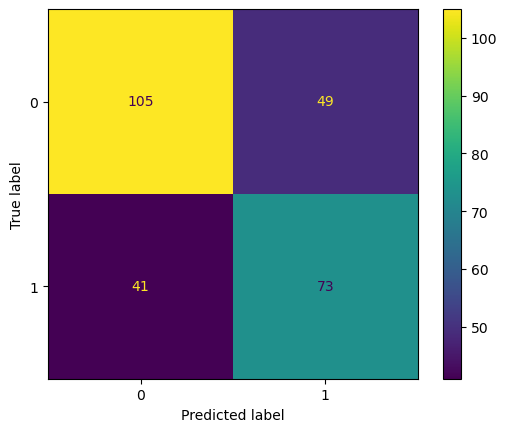

In [89]:
cm = confusion_matrix(y_test, y_test_pred, labels = model.classes_)
cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
cm.plot()

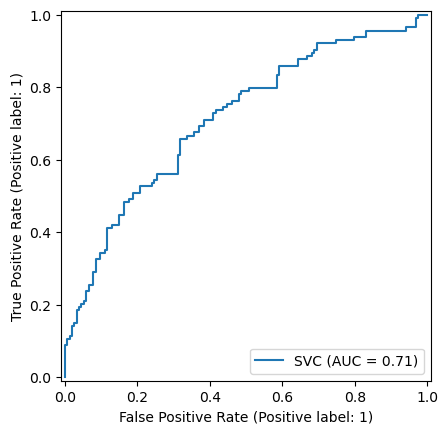

In [90]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model, x_test, y_test)

In [91]:
y_test_pred = model.predict(x_test)
test_score = accuracy_score(y_test, y_test_pred)
y_train_pred = model.predict(x_train)
train_score = accuracy_score(y_train, y_train_pred)
print("Train_score: ",train_score)
print('Test_score: ', test_score)

Train_score:  0.7275641025641025
Test_score:  0.664179104477612


# Grid Search Cross Validation for hyperparameter tuning

In [92]:
#Using Grid Search cross validation technique we will find the best value of hyper parameters - 
#Here we are finding the best kernel
from sklearn.model_selection import GridSearchCV
parameters = [ {'kernel': ['rbf','poly','sigmoid']}]
grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [93]:
best_parameters

{'kernel': 'rbf'}

In [94]:
#As the best kernel is RBF now we will fine tune the value of gamma
from sklearn.model_selection import GridSearchCV
parameters = [ {'kernel': ['rbf'], 'gamma':[0.1,1,10,100,], 'C':[0.01,0.1,1,10,100]}]
grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [95]:
best_parameters

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

# ModelTuning

In [96]:
from sklearn.svm import SVC
model_tuned = SVC(kernel='rbf',gamma=1, C=1)
model_tuned.fit(x_train,y_train)

SVC(C=1, gamma=1)

In [97]:
y_pred_test_tuned = model_tuned.predict(x_test)
accuracy_score(y_test, y_pred_test_tuned)

0.6417910447761194

In [98]:
y_pred_train_tuned = model_tuned.predict(x_train)
accuracy_score(y_train, y_pred_train_tuned)

0.8862179487179487

# Scorecard

In [99]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_auc_score, f1_score
score_card = pd.DataFrame(columns=['model_name','Accuracy Score','Precision Score','Recall Score','AUC Score','f1 Score'])


def update_score_card(y_test,y_pred,model_name):

    # assign 'score_card' as global variable
    global score_card 
    new_row = pd.DataFrame([{
        'model_name': model_name,
        'Accuracy Score': accuracy_score(y_test, y_pred),
        'Precision Score': precision_score(y_test, y_pred),
        'Recall Score': recall_score(y_test, y_pred),
        'AUC Score': roc_auc_score(y_test, y_pred),
        'f1 Score': f1_score(y_test, y_pred)
    }])

    # Use pd.concat() instead of append()
    score_card = pd.concat([score_card, new_row], ignore_index=True)
    

In [100]:
update_score_card(y_train, y_train_pred, 'model_train')
update_score_card(y_test, y_test_pred,'model_test')
update_score_card(y_train, y_pred_train_tuned, 'model_tuned_train')
update_score_card(y_test,y_pred_test_tuned,'model_tuned_test')

In [101]:
score_card

,model_name,Accuracy Score,Precision Score,Recall Score,AUC Score,f1 Score
0,model_train,0.727564,0.761733,0.669841,0.728125,0.712838
1,model_test,0.664179,0.598361,0.640351,0.661085,0.618644
2,model_tuned_train,0.886218,0.898693,0.873016,0.886346,0.885668
3,model_tuned_test,0.641791,0.562500,0.710526,0.650718,0.627907


**Interpretation: Initial model is looking bit better than the tuned model, also if we see the model which was tuned there is a good difference between the training and testing accuracies and it implies that there is a probable overitting happening in the model. This may happen due to the lesser volume of the data.**